John born in 1985
Mary born in 1965
Sam born in 1975
This program will provide an overview and analysis on baby names between the years 1910 and 2018.
                          Abbreviation
State                                 
Alabama                             AL
Alaska                              AK
Arizona                             AZ
Arkansas                            AR
California                          CA
Colorado                            CO
Connecticut                         CT
Delaware                            DE
the District of Columbia            DC
Florida                             FL
Georgia                             GA
Hawaii                              HI
Idaho                               ID
Illinois                            IL
Indiana                             IN
Iowa                                IA
Kansas                              KS
Kentucky                            KY
Louisiana                           LA
Maine                         

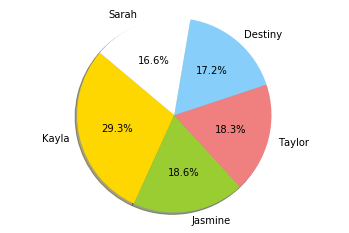

The most popuar male names were Michael, William, Christopher, John, Matthew. Distribution is as follows:


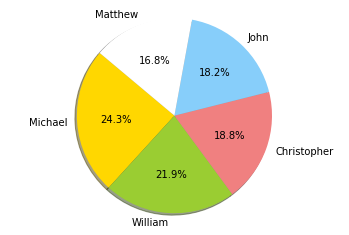


Returning to main menu...

Program Terminated


In [1]:
# -*- coding: utf-8 -*-
"""Final Project

Automatically generated by Colaboratory.

Original file is located at
    https://colab.research.google.com/drive/1G8_5CMjktEVUXFREKq3LuWx1q3mdHq-S
"""

import matplotlib.pyplot as plt
import csv
import pandas as pd
import numpy as np
import sys

class Kid:
    '''
    Authored by Matt for the purpose of having a kid object.
    '''
    def __init__(self, year, name=None):
        self.name = name  # Name, duh
        self.year = year

    def __add__(self, new_kid):
        '''
        Override method for addition of two objects
        :param new_kid: Additional Kid object to combine
        :return: Returns results of Children SuperClass, which
            adds both kids together into a group of children.
        '''
        return Children(self, new_kid)

class Children(Kid):
    '''
    Authored by Matt
    Super class group of kids, making a family!
    Attributes:
        components: Kids in the family/children group
    '''
    def __init__(self, kid1, kid2):
        super().__init__(self)
        self.components = [kid1, kid2]
        kid1.compound = self
        kid2.compound = self

    def __iadd__(self, kid):
        '''
        Override method for addition of two objects via += operator
        :param kid: Object: kid being added to initial kid
        :return: self: Object: kid receiving additional kid
        '''
        # Combine kid into children/family
        self.components.append(kid)
        kid.compound = self
        return self


def nameAnalysis(data, name):
    """
    Authored by Ted
    Function with two parameters. This function sorts years from the dataframe in ascending order with the corresponding name.
    The goal of this function is to save the names with the greatest occurances.
    :parameter: data, name
    """
    #THE FOLLOWING IS FOR CALLING THE EVENTS DATABASE
    #events = pd.read_csv("https://raw.githubusercontent.com/SatanicTadpole/final/master/events.csv")
    #eventsDF = pd.DataFrame(events) #The following two were attempting to remove the index
    #eventsDF = eventsDF.set_index('year')
    #Highest year is saved below

    is_name = data['name'] == name  #Iterates through every line of data frame to find which ones hold the name
    data_frame = data[is_name] #Saves all rows where name is to a new data frame
    data_frame = data_frame.sort_values(by=['year']) #Sorts the rows by year in ascending order
    data_frame = data_frame.set_index('year') #Sets year to index
    data_frame = pd.DataFrame(data_frame, columns=['count']) #Removes all columns except index (which is year) and count

    dict1 = data_frame.to_dict() #Forces to dictionary, unfortunately first index is "count"
    dict2 = dict1['count'] #Removes "count", giving us dictionary where key is year and value is count
    #print(dict2) #Working on percentage per year
    if len(dict2) == 0:
        print("Sorry, that name was not present in the database.")
        return None
    init_year = next(iter(dict2)) #This sets the initializing year to first key in dictionary of occurences
    pctDict = dict() #Empty dictionary for holding year/percentage
    highest = 0
    while init_year < 2017: #This creates dictionary where key = year and value = percentage
        if init_year in dict2:
            year_total = (data.loc[data['year'] == init_year, 'count'].sum())
            year_pctg = dict2[init_year] / year_total
            year_pctg = year_pctg * 100
            pctDict[init_year] = year_pctg
            if pctDict[init_year] > highest:
                highest = pctDict[init_year]
                greatestyear = init_year
            init_year += 1
        else:
            pctDict.update({init_year:(0)})
            init_year += 1
        inityear = list(pctDict.keys())[0]  #Also sets to first year of name occurence

    print("The name " + str(name) + " peaked in popularity in " + str(greatestyear) + ".")
    #greatestyear THIS HOLDS THE YEAR WITH THE MOST OCCURENCES

        #init_year += 1
    #print(pctDict)
    #lists_of_tuples = sorted(dict2.items()) #Creates list of tuples

    lists = sorted(pctDict.items()) # sorted by key, return a list of tuples

    x, y = zip(*lists) # unpack a list of pairs into two tuples

    plt.plot(x, y)
    plt.show()

def yearAnalysis(data, year):
    """
    Authored by Ted
    This function will print the five most popular male and female names by year. Order them from greatest occurrence to least. Test for gender 
    to group male names with males and female names with females. Display the occurances for male and female name in a pie chart.
    :parameters: data, year
    """

    is_year = data['year'] == year #Iterates through every line of Data frame to find which ones hold the same year
    data_frame = data[is_year] #Saves all rows where year matches to a new data frame
    data_frame = data_frame.sort_values(by=['count'], ascending=False) #Orders by occurences

    is_female = data_frame['gender'] == 'F' #Tests for F in gender
    f_data_frame = data_frame[is_female] #Data frame for females
    f_top5 = f_data_frame.head()
    
    list1 = f_top5["name"] #Is actually a data frame, but works for our purposes
    listFNames = list()
    for i in list1: #Turns top 5 female names into ist for piechart
        listFNames.append(i)
    countf = f_top5["count"]

    listFCount = list()
    for i in countf: #Turns counts for those 5 female names into list for piechart
        listFCount.append(i)    

    string = '' #Creates empty string
    for i in list1:  #Adds each entry to string with comma and space in between
        string = str(string + i + ', ')
    string = string[0:-2] #Removes ', ' from final entry
    print("\nIn " + str(year) + " the most popular female names were " + string + ". Distribution is as follows:")

    #Following is for female Pie Chart    
    labels = listFNames
    sizes = listFCount
    colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'white']  #color for each of the five names in pi chart
    plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
    plt.axis('equal')
    plt.show()

    is_male = data_frame['gender'] == 'M' #Tests for M in gender
    m_data_frame = data_frame[is_male] #Makes new data frame of only males
    m_top5 = m_data_frame.head() #Creates value top 5 for men
    listm = m_top5["name"]
    listMNames = list() 
    for i in listm:
        listMNames.append(i)
    countm = m_top5["count"]
    listMCount = list() 
    for i in countm:
        listMCount.append(i)
    stringm = ''
    for i in listm:
        stringm = str(stringm + i + ', ')
    stringm = stringm[0:-2]
    print("The most popuar male names were " + stringm + ". Distribution is as follows:")


    labels = listMNames
    sizes = listMCount
    colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'white']
    plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
    plt.axis('equal')
    plt.show()   

def investigate():
    '''
    Authored by Amari & Ted
    '''
    fiftyStates = ['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA', 'HI', 'ID', 'IL', 'IN', 'IA', 
                   'KS', 'KY', 'LA', 'ME', 'MD', 'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 
                   'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VT', 
                   'VA', 'WA', 'WV', 'WI', 'WY', 'DC']  # List of 50 state acronyms for input validation
    print("This program will provide an overview and analysis on baby names between the years 1910 and 2018.")
    choiceState = 'HELP'    #help statement displays the abbreviation for each state
    while choiceState not in fiftyStates:
        choiceState = input("""Please double check the abbreviation of the state you would like to use and try again: 
        To see a list of abbreviations type 'Help': """)
        if choiceState == 'HELP':
            choiceState = input("""Please enter the abbreviation of the state you would like to investigate (ie. MD for Maryland.)
            To see a list of abbreviations type 'Help': """)
        choiceState = choiceState.upper()
        if choiceState == 'HELP':
            abb = pd.read_csv('https://raw.githubusercontent.com/SatanicTadpole/final/master/abbreviations.csv')
            abbDF = pd.DataFrame(abb) #The following two were attempting to remove the index
            abbDF = abb.set_index('State')
            print(abbDF)
    else:
        url = 'https://raw.githubusercontent.com/SatanicTadpole/final/master/' + choiceState + '.csv'

    #abbreviations = pd.read_csv('https://raw.githubusercontent.com/SatanicTadpole/final/master/abbreviations.csv')
    #abbreviations = abbreviations.set_index('year')
    #adict = abbreviations.to_dict()
    #print(adict)
    data = pd.read_csv(url) #Loads CSV
    #print(data.head()) #Check data layout
    df = pd.DataFrame(data, columns=['year', 'gender', 'name', 'count']) #Removes "state" from set, not needed as it is always MD

    print('You have chosen ' + choiceState +'.')
    
    # choice = None #Sets empty value for choice
    choice = input("""Would you like to: 
        1. See data by year
        2. See data by name
        3. Return to main menu
        Please make an entry based on the number: """)

    while choice != '3':        
        while choice == None:
            choice = input("""Would you like to: 
            1. See data by year
            2. See data by name
            3. Return to main menu
            Please make an entry based on the number: """)
        if choice == '1':
            year = int(input("Enter a year: "))
            yearAnalysis(df, year)
            choice = None
        if choice == '2':
            name = input("Enter a name: ")
            nameAnalysis(df, name)
            choice = None
        if choice == '3':
            exit()
        else:
            choice = input("""Would you like to: 
            1. See data by year
            2. See data by name
            3. Return to main menu
            Please make an entry based on the number: """)
    print("\nReturning to main menu...")

def buildFamily():
    '''
    Authored by Julian
    '''
    numKids = int(input("""Now that you have name options, let's build a family!
    How many children are you planning on:"""))
    kid_names = []
    kid_years = []
    for i in range(0,numKids):
        name = input("Name of Thing"+str(i+1)+": ")
        year = int(input("Birthyear of Thing"+str(i+1)+": "))
        kid_names.append(name)
        kid_years.append(year)
    kids = list()
    for kid in range(numKids):
        kids.append(Kid(kid_years[kid],kid_names[kid]))
    for i in kids:
        print(str(i.name)+" born in "+str(i.year))

if __name__=="__main__":
    '''
    Authored by Matt
    '''
    mainChoice = None
    #global_year = 1910
    #global_name = Thing1
    #global_gender = undefined
    mainChoice = input("""Would you like to: 
            1. Investigate names
            2. Build your family
            3. Exit program
            Please make an entry based on the number: """)
    while mainChoice != '3':        
        while mainChoice == None:
            mainChoice = input("""Would you like to: 
            1. Investigate names
            2. Build your family
            3. Exit program
            Please make an entry based on the number: """)
        if mainChoice == '1':
            investigate()
            mainChoice = None
        if mainChoice == '2':
            buildFamily()
            mainChoice = None
        if mainChoice == '3':
            mainChoice = None
            exit()
        else:
            mainChoice = input("""Would you like to: 
            1. Investigate names
            2. Build your family
            3. Exit program
            Please make an entry based on the number: """)
    print("\nProgram Terminated")